In [31]:
import json
import matplotlib.pyplot as plt

with open('Results/pareto_summary.json', 'r') as f:
    pareto_summary = json.load(f)

classifier_names = {"LogisticRegression": "Regressão logística", 
                    "DecisionTreeClassifier": "Árvore de decisão",
                    "KNeighborsClassifier": "K-vizinhos mais próximos",
                    "LinearSVM": "MVS linear",
                    "RBFSVM": "MVS FBR",
                    "RandomForest": "Floresta aleatória",
                    "NeuralNet": "Rede neural",
                    "AdaBoost": "AdaBoost",
                    "NaiveBayes": "Bayes ingênuo",
                    "QDA": "Análise discriminante quadrática"
                    }

pareto_summary = [entry for entry in pareto_summary if entry['trials_done'] >200]
compressor_models = set(entry['compressor_model'] for entry in pareto_summary)
pareto_summary = {model: [trial for trial in pareto_summary if trial['compressor_model'] == model] for model in compressor_models}

for compressor_studies in pareto_summary.values():
    for study in compressor_studies:
        study.pop("compressor_model", None)
        study["pareto_values"] = [list(x) for x in set(tuple(row) for row in study["pareto_values"])] # Remove duplicates
        study["classifier"] = classifier_names.get(study["classifier"], "")

def plot_pareto(compressor_model):
    studies = pareto_summary[compressor_model]
    fig, ax = plt.subplots()
    for study in studies:
        pareto = study['pareto_values']
        pareto = sorted(pareto, key=lambda x: x[0])
        x, y = zip(*pareto)
        y = [val * 100 for val in y]
        ax.plot(x, y, marker='o', linestyle='--', label=study['classifier'])
    ax.set_xlabel('CCM [adim]')
    ax.set_ylabel('Observações rotuladas [%]')
    ax.set_ylim(20, 100)
    ax.set_xlim(-0.1, 0.9)
    ax.grid(True)
    ax.legend()
    return fig

pareto_summary

{'a': [{'classifier': 'Regressão logística',
   'trials_done': 259512,
   'last_pareto': 259474,
   'pareto_values': [[0.5985164691633672, 0.891432111169862],
    [0.5584113459803247, 0.9129737351992614],
    [0.7756567390660637, 0.27995062506339896],
    [0.5962147328472656, 0.8950767853189461],
    [0.5433723973072375, 0.9129737351992615],
    [0.800039605968059, 0.2791099943373976],
    [0.5983183601362225, 0.8919029045594988],
    [0.601312703092369, 0.8898312658951915],
    [0.7835531074013227, 0.27970618537526326],
    [0.5843804209599242, 0.912142029746594],
    [0.7578839376078111, 0.4520235222745874],
    [0.7266128000621568, 0.45244596858845615],
    [0.5901890147099808, 0.9118979399646191],
    [0.5972109085262438, 0.892453436538735],
    [0.7725594916090709, 0.28014750810734185],
    [0.6041998744704843, 0.8872627016371618],
    [0.595452658144294, 0.895258273893125],
    [0.6066222329965887, 0.8870259719830128],
    [0.5997444115295829, 0.8901281620820646],
    [0.69991863

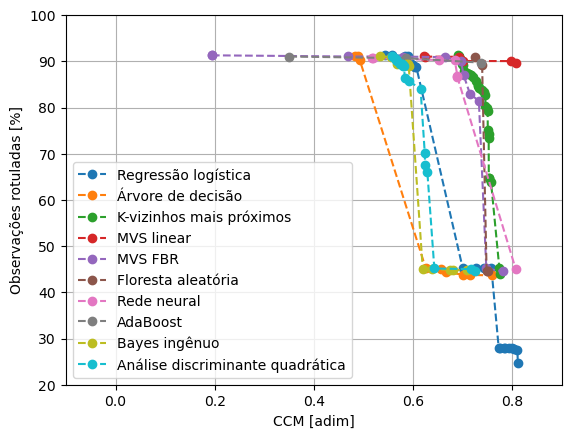

In [32]:
fig = plot_pareto("a")
fig.savefig("Results/pareto_figs/pareto_a_pt.pdf", format='pdf', bbox_inches='tight')

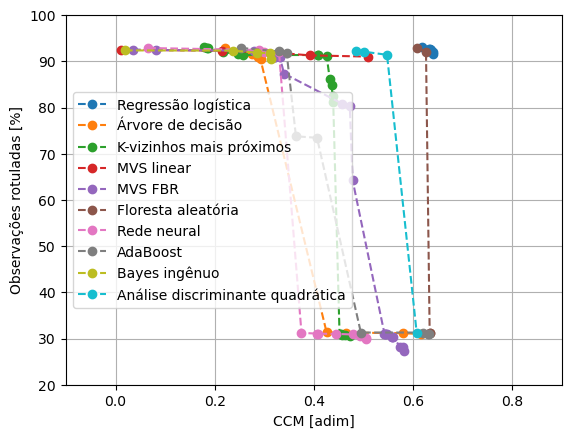

In [33]:
fig = plot_pareto("b")
fig.savefig("Results/pareto_figs/pareto_b_pt.pdf", format='pdf', bbox_inches='tight')

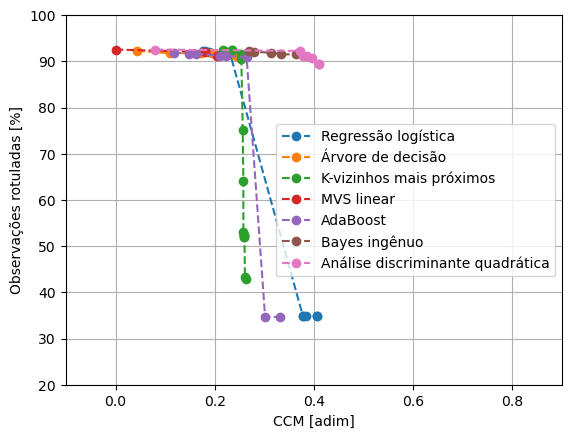

In [34]:
fig = plot_pareto("all")
fig.savefig("Results/pareto_figs/pareto_all_pt.pdf", format='pdf', bbox_inches='tight')